<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting Obesity Prevalence in US Counties </h3> </center>
<center><h4>Haden Pelletier, Joseph Valenti, Ajay Rao</h4></center>



<hr style="height:2px; border:none; color:black; background-color:black;">

### Executive Summary:

Our project looks at how socioeconomic factors can be used to predict obesity risk in US counties. Obesity prevalence for every US county was provided and was classified as either low, moderate, or high depending on calculated binning criteria. 

Hypotheses about the best and worst correlated socioeconomic factors with obesity prevalence were explored and results reported. 3 supervised machine-learning classification models were used and evaluated for their performance with the dataset (KNN, GaussianNB, and Decision Trees). A hypothesis about the best model for the dataset was explored and results reported.

The best parameters for each machine learning model were determined with GridSearchCV. Each tuned model’s performance using a cross-validation and percentage-split approach was calculated. 

Comparisons between tuned vs untuned model performance revealed each model’s test set score when trained with our dataset. K-Nearest-Neighbors had the highest performance on our dataset.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In the United States, the increasing prevalence of obesity has become a serious medical concern that plagues millions of Americans. While advances in medicine have developed effective treatments for obesity, the true cure for obesity relies on its prevention. Genetic factors are known to be correlated with obesity in affected individuals, but other external factors may also contribute to disease acquisition/pathology. Using data analysis, external factors linked to obesity can be identified that may be instrumental in preventative medicine for predisposed individuals. Particularly, we are interested in exploring how patient socioeconomic status relates to the prevalence of obesity in the United States. By analyzing obese patient data by U.S counties, we hope to explore any correlations/patterns between obesity, race, education level, insurance status, poverty, food diet, and other variables. This topic is useful to explore because analyzing patient data may lead to the early identification of U.S. areas that are at high risk for obesity which can inform healthcare professionals to target those high-risk areas and help improve resident patient outcomes and even reduce the obesity prevalence in those areas. We are specifically interested in this project because we know close friends and family members who are affected by obesity and we would like to learn more about how and why certain individuals may be more susceptible to the disease than others. 

This problem is important to address because obesity is a preventable disease that causes or contributes to millions of deaths in the United States. Deaths due to obesity or complications from it are very unfortunate, especially since early detection of the disease can drastically reduce patient mortality rate. Examining how patient socioeconomic status correlates with American obesity could lead to insights about how variables such as race and poverty can influence a person’s physical health. Insights from the project could include understanding if socioeconomic status has significant correlations with American obesity. Understanding such a correlation could be influential for public health officials or healthcare professionals in identifying those high-risk patients for early obesity screenings and directly contributing towards obesity prevention.

Machine learning research involving obesity prevalence has been explored before with the goal of predicting obesity in young people. In the paper “Machine Learning Approach for the Early Prediction of the Risk of Overweight and Obesity in Young People” (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7303691/), researchers used the UK millennium cohort study to develop a machine learning driven model to predict the risk of a young person becoming overweight or obese. Using childhood BMI values at ages 3, 5, 7, and 11, the machine learning model attempted to predict the risk of a 14 year old adolescent becoming overweight or obese. Several supervised classification machine learning algorithms were used, such as KNN and SVM, to classify 14 year old adolescents for being normal or at risk for becoming overweight or obese. The study results were encouraging because a prediction accuracy of over 90% for the target class was achieved. Studies, such as the one just discussed, have demonstrated that using machine learning models in the context of obesity data can be a strong tool to identify an at-risk population for being overweight or obese. 

## HYPOTHESIS AND QUESTIONS

<b>Questions:</b>

* Which feature (socioeconomic factor) has the highest correlation with obesity prevalence? 
* Which feature has the lowest correlation with obesity prevalence?
* Which features affect obesity prevalence the most?
* Is kNN a better (higher performance) machine-learning algorithm for our data than SVM, Decision Tree, or GaussianNB? 

<b>Hypotheses:</b>

1. The top two socioeconomic risk factors with the greatest correlation (predictive ability) with obesity are poverty prevalence and no high school (HS) diploma.

2. The socioeconomic risk factors with the lowest correlation (predictive ability) with obesity are major depression prevalence and population.

3. The K-Nearest-Neighbors (kNN) classification algorithm will yield the best performance compared to Decision Trees or Gaussian Naive Bayes (Gaussian NB). 

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a **separate** script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset (i.e., what it is about) and the number of variables/rows included.


In [95]:
import pandas as pd

We pulled our data from 3 separate data sets, all of which came from a zip file on this site:
https://catalog.data.gov/dataset/community-health-status-indicators-chsi-to-combat-obesity-heart-disease-and-cancer

We used 3 files in this zip:
DEMOGRAPHICS.CSV
RISKFACTORSANDACCESSTOCARE.CSV
VULNERABLEPOPSANDENVHEALTH.CSV

In [96]:
#Get data from Github

url_demo = 'https://github.com/hadenpell/ds3000final/blob/master/datasets/DEMOGRAPHICS.csv?raw=true'
url_risk = 'https://github.com/hadenpell/ds3000final/blob/master/datasets/RISKFACTORSANDACCESSTOCARE.csv?raw=true'
url_vul = 'https://github.com/hadenpell/ds3000final/blob/master/datasets/VUNERABLEPOPSANDENVHEALTH.csv?raw=true'

demo_df = pd.read_csv(url_demo)
risk_df = pd.read_csv(url_risk)
vul_df = pd.read_csv(url_vul)

We searched these data sets for the data we wanted.

We wanted to include columns for : County Name, State Name, Population Size, Obesity, No Exercise, Few Fruits / Vegetables, 
Poverty, No HS Diploma, Major Depression, Diabetes, Uninsured, Non-White (Original data set provided all races by percentage. To find the percentage of non white people in the population, we subtracted the percentage of white population from 100.)

We also wished to define everything in terms of prevalence. Some of the data points were in population form (e.g returned the actual count of people who had major depression in county x).

### 2.2. Data Analysis

For hypothesis 1, the independent variable (IV) is the socioeconomic risk factor with 10 levels: prevalence of poverty, prevalence of no exercise, prevalence of few fruits/vegetables, prevalence of major depression, prevalence of diabetes, prevalence of non-white racial identity, prevalence of uninsured, prevalence of high blood pressure, prevalence of no high school (HS) diploma, and population in US counties. The dependent variable (DV) is the IV’s correlation (predictive ability) with obesity prevalence in those US counties. 

For hypothesis 2, the independent variable (IV) is the socioeconomic risk factor with 10 levels: prevalence of poverty, prevalence of no exercise, prevalence of few fruits/vegetables, prevalence of major depression, prevalence of diabetes, prevalence of non-white racial identity, prevalence of uninsured, prevalence of high blood pressure, prevalence of no high school (HS) diploma, and population in US counties. The dependent variable (DV) is the IV’s correlation (predictive ability) with obesity prevalence in those US counties.

For hypothesis 3, the independent variable (IV) is the supervised machine learning classification algorithm with 3 levels: KNN, Decision Trees, and GaussianNB. The dependent variable (DV) is the model performance with our dataset.

Synthesizing our various hypotheses, our primary focus is to predict the obesity prevalence class [Low,Moderate,High] in a US county from various socioeconomic feature variables. Socioeconomic factors, such as the prevalence of poverty or high blood pressure, have been widely studied across several disciplines and have been determined to be significant risk factors for obesity in a given population. Poverty in particular is known to be very highly correlated with obesity. As a lack of HS diploma is correlated with poverty, we believe these will be the most important features for our model. Major depression is linked to problems with eating, however there is not very strong evidence that it is linked to overeating in all cases (in many, depression is linked to undereating). It will be interesting to see the relationship between depression and obesity prevalence, however, we do not believe it will be as significant as other factors. Similarly, we believe population size will have little to no effect on obesity prevalence in a county, and because of this we have predicted that depression and population are the least predictive factors. We hope to predict obesity prevalence in a US county by some/all of that county’s socioeconomic factors: population, no exercise prevalence, few fruits/vegetables consumption prevalence, no high school diploma prevalence, major depression prevalence, diabetes prevalence, non-white racial identity prevalence, uninsured prevalence, and high blood pressure prevalence. 

To better contextualize quantitative obesity prevalence data, obesity prevalence values will be classified into “high”, “moderate” or “low” categories depending on calculated binning criteria. Given that our data contains a labelled target variable, we are using a supervised machine learning model. Since we are looking to predict the category of obesity prevalence from our feature variables, we are specifically focusing on using classification algorithms. By analyzing the prevalence data from our feature variables, we hope to predict a sample county’s obesity prevalence category, which can be assessed as the obesity risk for that population.

We will be testing and evaluating our classification model with 3 classification algorithms: K-Nearest-Neighbors, Decision Trees, and Gaussian Naive Bayes. K-Nearest-Neighbors will be used because it is easy to understand, is easily hyperparameter tunable, and offers strong performance when using datasets with few features (like ours). Decision Trees will be used because the data can be easily visualized and interpreted and feature normalization and scaling are typically not needed. Gaussian Naive Bayes will be used because the model is simple to understand, offers efficient parameter estimation, and offers a good baseline comparison against other classification algorithms.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


## Data cleaning

We merged the 3 data sets and kept only desired columns.

In [97]:
merged_df = demo_df.merge(vul_df).merge(risk_df)

In [98]:
#Keeping only non zero and positive values for columns with negative values 
#(The data set specified that negative values = missing data) 
merged_df = merged_df[merged_df['Obesity'] > 0]
merged_df = merged_df[merged_df['No_Exercise'] > 0]
merged_df = merged_df[merged_df['Few_Fruit_Veg'] > 0]
merged_df = merged_df[merged_df['High_Blood_Pres'] > 0]
merged_df = merged_df[merged_df['Uninsured'] > 0]

In [99]:
#Create "Non-White column"
merged_df["Non-White"] = 100 - merged_df["White"]

In [100]:
merged_df

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,Min_Population_Size,...,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind,Non-White
0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,28447,...,9.1,19.3,5690,4762,1209,45.3,22.6,1,2,19.3
1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,118395,...,5.2,9.3,19798,22635,3839,67.0,30.8,1,2,11.6
7,1,15,Calhoun,Alabama,AL,6,"frontier status, population size, poverty",53,112141,111380,...,8.4,13.9,16456,16440,5301,75.8,41.9,1,2,21.7
10,1,21,Chilton,Alabama,AL,32,"frontier status, population size, poverty, age",37,41744,29918,...,3.2,8.9,6130,4527,1307,31.1,19.2,1,2,11.7
21,1,43,Cullman,Alabama,AL,21,"frontier status, population size, poverty, age",44,79886,53309,...,6.5,13.5,11912,11129,2400,53.8,22.5,1,2,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56,37,Sweetwater,Wyoming,WY,77,"frontier status, population size",15,37975,26995,...,4.2,6.4,5477,3260,572,50.0,52.7,2,1,4.5
3137,56,39,Teton,Wyoming,WY,78,"frontier status, population size, poverty, age",43,19032,765,...,1.4,3.4,1846,1393,82,147.1,57.8,2,2,2.1
3138,56,41,Uinta,Wyoming,WY,38,"frontier status, population size, poverty, age",35,19939,7467,...,3.4,6.2,3007,1431,357,65.2,40.1,2,1,2.5
3139,56,43,Washakie,Wyoming,WY,82,"frontier status, population size, poverty, age",37,7933,1573,...,6.6,12.1,1178,1338,136,50.4,50.4,1,1,2.8


In [101]:
#filtering out only desired columns
cols = ["CHSI_County_Name", "CHSI_State_Name",
                        "Population_Size","Obesity","No_Exercise",
                        "Few_Fruit_Veg","Poverty","No_HS_Diploma","Major_Depression","Diabetes",
           "Non-White","Uninsured","High_Blood_Pres"]

df_cols = merged_df[cols]
df_cols

,CHSI_County_Name,CHSI_State_Name,Population_Size,Obesity,No_Exercise,Few_Fruit_Veg,Poverty,No_HS_Diploma,Major_Depression,Diabetes,Non-White,Uninsured,High_Blood_Pres
0,Autauga,Alabama,48612,24.5,27.8,78.6,10.4,6690,2680,14.2,19.3,5690,29.1
1,Baldwin,Alabama,162586,23.6,27.2,76.2,10.2,20254,9354,7.2,11.6,19798,30.5
7,Calhoun,Alabama,112141,27.0,29.2,81.9,16.4,19546,6400,11.2,21.7,16456,33.2
10,Chilton,Alabama,41744,31.2,30.3,82.8,14.9,9484,2355,6.0,11.7,6130,26.5
21,Cullman,Alabama,79886,22.2,29.4,76.2,13.3,16275,4572,10.0,2.7,11912,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Sweetwater,Wyoming,37975,23.6,21.9,80.7,8.6,3081,2649,5.3,4.5,5477,22.7
3137,Teton,Wyoming,19032,9.0,9.6,68.8,5.6,762,1455,2.4,2.1,1846,18.9
3138,Uinta,Wyoming,19939,22.7,23.4,83.1,10.6,1842,1347,4.8,2.5,3007,22.5
3139,Washakie,Wyoming,7933,21.1,23.2,78.1,11.1,780,576,9.4,2.8,1178,27.8


In [102]:
#Make a new data frame that is a copy of df_cols to do data transformations on
obesity = df_cols[cols]

In [103]:
def make_prev(column):
    obesity[column] = df_cols[column] / df_cols['Population_Size'] * 100

In [104]:
make_prev("Major_Depression")
make_prev("Uninsured")
make_prev("No_HS_Diploma")

In [107]:
obesity["Major_Depression"]

0       5.513042
1       5.753263
7       5.707101
10      5.641529
21      5.723155
          ...   
3136    6.975642
3137    7.645019
3138    6.755605
3139    7.260809
3140    7.555089
Name: Major_Depression, Length: 1436, dtype: float64

In [108]:
obesity["Uninsured"]

0       11.704929
1       12.176940
7       14.674383
10      14.684745
21      14.911249
          ...    
3136    14.422646
3137     9.699454
3138    15.080997
3139    14.849363
3140    12.996552
Name: Uninsured, Length: 1436, dtype: float64

In [109]:
obesity["No_HS_Diploma"]

0       13.762034
1       12.457407
7       17.429843
10      22.719433
21      20.372781
          ...    
3136     8.113232
3137     4.003783
3138     9.238176
3139     9.832346
3140    10.493179
Name: No_HS_Diploma, Length: 1436, dtype: float64

In [110]:
#Save cleaned data set to csv
obesity.to_csv("CleanData_Obesity.csv")

## Scaling features

We used Sklearn's standard scaler to standardize our features.

In [111]:
from sklearn.preprocessing import StandardScaler

to_scale = obesity[["Population_Size", "No_Exercise", "Few_Fruit_Veg", "Poverty", "No_HS_Diploma", 
      "Major_Depression", "Diabetes", "Non-White", "Uninsured", "High_Blood_Pres", "Obesity"]]

s = StandardScaler()
s.fit(to_scale)
scaled = s.transform(to_scale)

obesity_scaled = pd.DataFrame(scaled)

obesity_scaled = obesity_scaled.rename(columns={0:"Population_Size", 1:"No_Exercise", 2:"Few_Fruit_Veg",
                              3:"Poverty", 4:"No_HS_Diploma",5:"Major_Depression",6:"Diabetes",
                              7:"Non-White",8:"Uninsured",9:"High_Blood_Pres",10:"Obesity"})

## Creating Bins

We then feature engineered our obesity prevalence rate data to create 3 bins
for our model to make predictions on: Low, Moderate, and High

In [112]:
from sklearn.preprocessing import KBinsDiscretizer

In [113]:
discretizer = KBinsDiscretizer(n_bins=3, encode = "onehot-dense", strategy="quantile")

ob_discretized = discretizer.fit_transform(obesity_scaled["Obesity"].values.reshape(-1,1))

In [114]:
#Get the edges of the bins to determine categories
edges = discretizer.bin_edges_[0]
edges

array([-3.49456144, -0.41691755,  0.38694466,  3.39568607])

Categories determined using bin edges of scaled data.

Low: -3.5 to -0.42

Moderate: -0.42 to 0.39

High: 0.39 to 3.4

In [115]:
#Add an extra column, "Obesity_Class", which maps the function below onto a new column
#using obesity prevalence rates from "Obesity" column

def classify_prev(data):
    if(data < edges[1]):
        return "Low"
    elif(data > edges[2]):
        return "High"
    else:
        return "Moderate"
    
obesity_scaled["Obesity_Class"] = obesity_scaled["Obesity"].map(classify_prev)

In [116]:
#Drop obesity column for training/testing
obesity_scaled.drop("Obesity",axis=1,inplace=True)

In [117]:
obesity_scaled

,Population_Size,No_Exercise,Few_Fruit_Veg,Poverty,No_HS_Diploma,Major_Depression,Diabetes,Non-White,Uninsured,High_Blood_Pres,Obesity_Class
0,-0.305182,0.318660,0.159139,-0.445303,0.158522,-0.828587,3.147941,0.397224,-0.281140,0.456134,Moderate
1,-0.044053,0.225172,-0.344540,-0.488345,-0.102272,-0.466364,-0.076834,-0.127511,-0.175617,0.719908,Moderate
2,-0.159629,0.536801,0.851697,0.845960,0.891715,-0.535971,1.765895,0.560778,0.382710,1.228616,High
3,-0.320917,0.708197,1.040576,0.523144,1.949101,-0.634844,-0.629652,-0.120696,0.385027,-0.033733,High
4,-0.233529,0.567964,-0.344540,0.178808,1.480007,-0.511762,1.213076,-0.734022,0.435664,1.567755,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.329553,-0.600646,0.599857,-0.832682,-0.970671,1.376832,-0.952130,-0.611357,0.326432,-0.749692,Moderate
1432,-0.372954,-2.517165,-1.897549,-1.478314,-1.792147,2.386170,-2.288108,-0.774911,-0.729484,-1.465651,Low
1433,-0.370876,-0.366924,1.103536,-0.402261,-0.745795,1.045043,-1.182471,-0.747652,0.473612,-0.787374,Moderate
1434,-0.398383,-0.398087,0.054206,-0.294656,-0.627021,1.806830,0.936667,-0.727207,0.421829,0.211201,Low


## Split data into features and target

In [118]:
features = obesity_scaled.drop("Obesity_Class", axis=1)
target = obesity_scaled["Obesity_Class"]

In [119]:
features

,Population_Size,No_Exercise,Few_Fruit_Veg,Poverty,No_HS_Diploma,Major_Depression,Diabetes,Non-White,Uninsured,High_Blood_Pres
0,-0.305182,0.318660,0.159139,-0.445303,0.158522,-0.828587,3.147941,0.397224,-0.281140,0.456134
1,-0.044053,0.225172,-0.344540,-0.488345,-0.102272,-0.466364,-0.076834,-0.127511,-0.175617,0.719908
2,-0.159629,0.536801,0.851697,0.845960,0.891715,-0.535971,1.765895,0.560778,0.382710,1.228616
3,-0.320917,0.708197,1.040576,0.523144,1.949101,-0.634844,-0.629652,-0.120696,0.385027,-0.033733
4,-0.233529,0.567964,-0.344540,0.178808,1.480007,-0.511762,1.213076,-0.734022,0.435664,1.567755
...,...,...,...,...,...,...,...,...,...,...
1431,-0.329553,-0.600646,0.599857,-0.832682,-0.970671,1.376832,-0.952130,-0.611357,0.326432,-0.749692
1432,-0.372954,-2.517165,-1.897549,-1.478314,-1.792147,2.386170,-2.288108,-0.774911,-0.729484,-1.465651
1433,-0.370876,-0.366924,1.103536,-0.402261,-0.745795,1.045043,-1.182471,-0.747652,0.473612,-0.787374
1434,-0.398383,-0.398087,0.054206,-0.294656,-0.627021,1.806830,0.936667,-0.727207,0.421829,0.211201


In [120]:
target

0       Moderate
1       Moderate
2           High
3           High
4       Moderate
          ...   
1431    Moderate
1432         Low
1433    Moderate
1434         Low
1435    Moderate
Name: Obesity_Class, Length: 1436, dtype: object

## Train test split

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

## Feature selection

In [123]:
from sklearn.feature_selection import SelectKBest

In [124]:
select = SelectKBest(k=5)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [125]:
select.get_support()

array([False,  True, False,  True,  True, False,  True, False, False,
        True])

In [126]:
print(features.columns)

Index(['Population_Size', 'No_Exercise', 'Few_Fruit_Veg', 'Poverty',
       'No_HS_Diploma', 'Major_Depression', 'Diabetes', 'Non-White',
       'Uninsured', 'High_Blood_Pres'],
      dtype='object')


From this we can determine that the 5 best features to select for model performance are:
* No exercise
* Poverty
* No HS Diploma
* Diabetes
* High blood pressure

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


1. SCATTER MATRIX

The scatterplot matrix visualizes correlations between our top 5 features (from feature selection analysis) against each other. All the feature variables that are plotted against different features display strong correlations. The results from the scatter matrix indicate that the socioeconomic feature variables seem to be strongly related, which can be helpful to identify how the features would be expected to trend when correlated with obesity prevalence. For example, if it is later observed that no exercise prevalence is strongly correlated with obesity prevalence, then it is likely that diabetes prevalence is also highly correlated with obesity prevalence (since no exercise prevalence and diabetes prevalence are highly correlated).

In [127]:
import plotly.express as px

In [128]:
px.scatter_matrix(obesity,height=750, title='Plotting top 5 features against each other',
                  dimensions = ["Diabetes","High_Blood_Pres","Poverty","No_Exercise","No_HS_Diploma"], color = "Obesity")

Link to this graph: https://github.com/hadenpell/ds3000final/blob/tuning/scatter-matrix.png

2. SCATTERPLOT

The scatterplots visualize all our feature variables against obesity prevalence. The purpose of the scatterplots was to visually observe if any of the feature variables independently had high or low correlations with obesity prevalence. The results visually show a strong correlation between obesity prevalence and: no exercise prevalence, few fruits/vegetables prevalence, poverty prevalence, diabetes prevalence, and high blood pressure prevalence. The results show a moderate to low correlation between obesity prevalence and: major depression prevalence, non-white prevalence, no highschool (HS) diploma prevalence, uninsured prevalence, and population. From the scatterplot results, the features with stronger correlations with obesity prevalence are most likely the most important features for the purposes of building and optimizing our machine learning models.

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

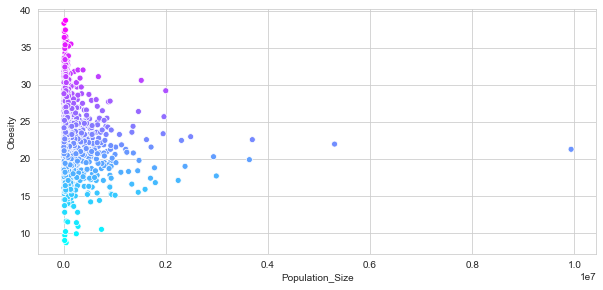

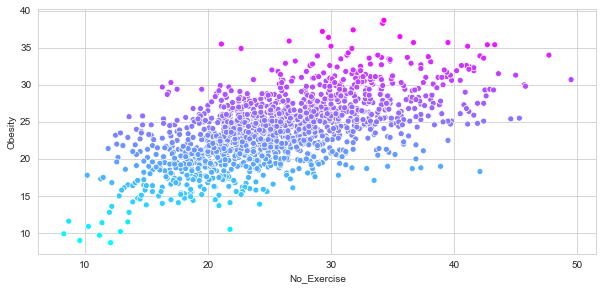

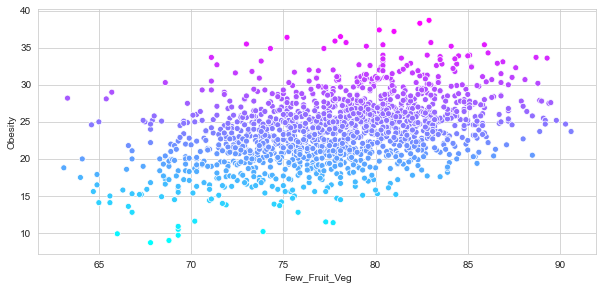

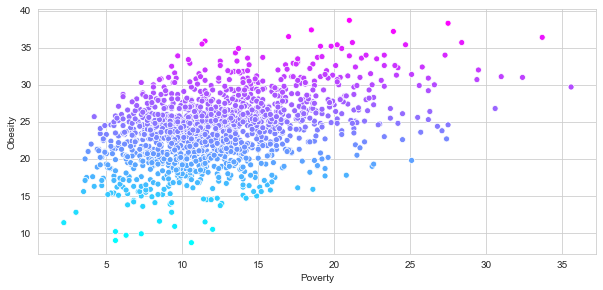

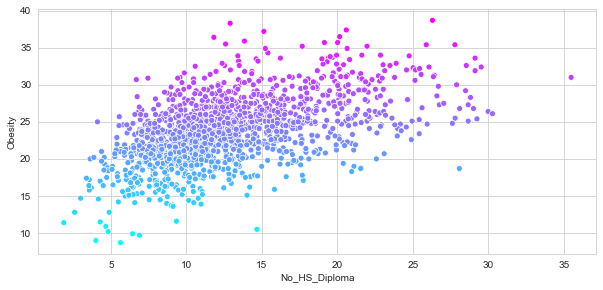

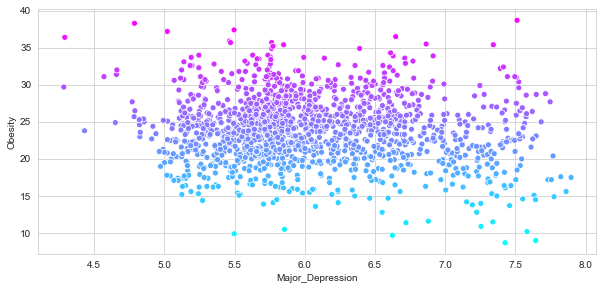

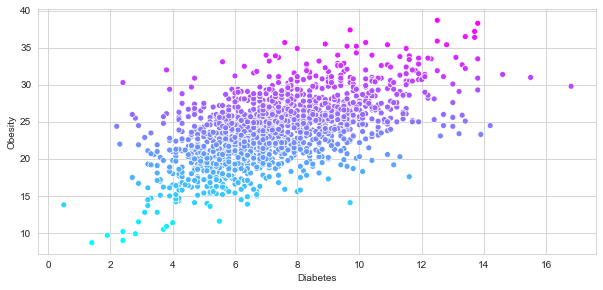

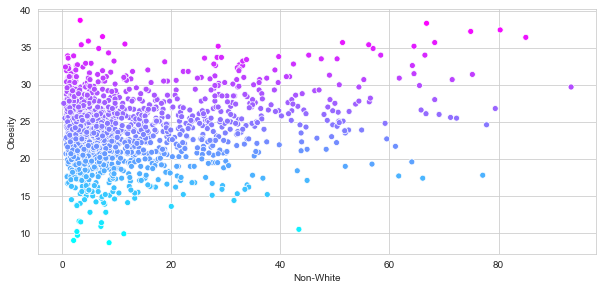

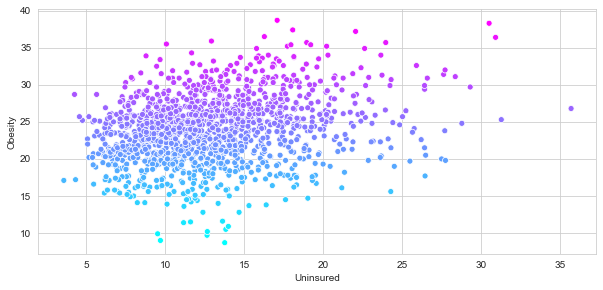

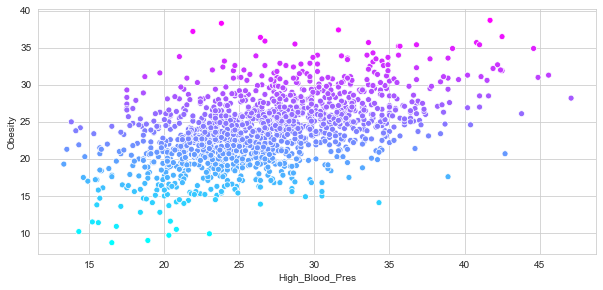

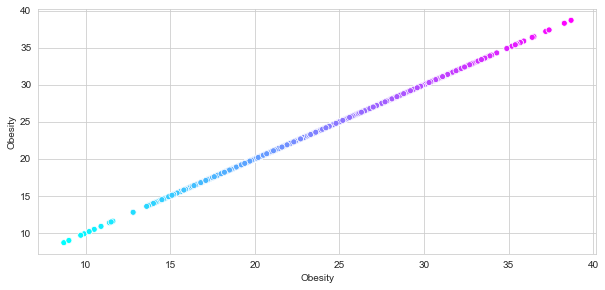

In [130]:
for feature in to_scale:
    plt.figure(figsize=(10, 4.5))
    sns.scatterplot(data=to_scale, x=feature, y='Obesity', hue='Obesity', palette='cool', legend=False)

3. HEAT MAP

The heatmap visualizes the relative Z-score values of all our feature variables for every US county in the dataset. The higher Z-score values are represented by the darker coloring and the lower Z-score values are represented by lighter coloring. The heat map gives a visual indication of the distribution of feature variable values for each US county in the dataset which aids in a general overview understanding of the data. Using the heatmap, we are able to generally observe how the feature variable values for each US county compare with each other, which can help provide some insight about predicting which feature variables could be especially important for correlational tests between the feature variable and obesity prevalence. 

For our figures, a value above the mean is shown with red tinted values that increase in 
brightness as divergence increased, where as values below the mean were blue tinted that increase in brightness 
as they diverged from the mean.  These values on the graph were centered at 0 (the mean), and were capped at 3
in both positive and negative direction in order to show a better color reflection, as higher standards above 
the mean lowered the diversity of color while not providing additional information.  The results of these were 
interesting as the results were pretty diverse, but they were still successful as the higher obesity class
had values more typically above the mean, meaning more red values, and the lower obesity class had values 
below the mean more frequently, resulting in more blue.  The variance in the colors speaks to the complexity
of the issue.  One additional thing to note was there seemed to be a trend in counties that had data not fitting
in the trend, meaning that if a county had a low z score in one feature, many other features also reflected this. 

In [131]:
import plotly

<ipython-input-132-01f4ffae02bd>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



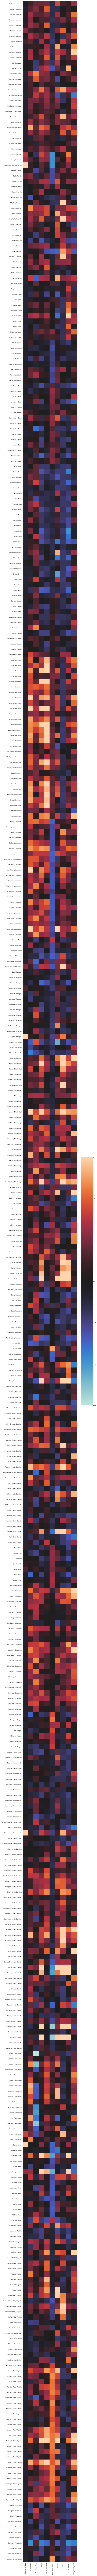

In [132]:
obesity_high_heat_map = obesity[obesity["Obesity"] > 25.6]

combined_name = obesity_high_heat_map["CHSI_County_Name"] + ", " + obesity_high_heat_map["CHSI_State_Name"]

feature_cols= ["Population_Size", "No_Exercise", "Few_Fruit_Veg", "Poverty", "No_HS_Diploma", 
      "Major_Depression", "Diabetes", "Non-White", "Uninsured", "High_Blood_Pres"]

def z_score(value, population_mean, population_std_dev):
    return ((value - population_mean)/population_std_dev)

for feature in feature_cols: 
    #Find means of entire column
    feature_mean = obesity[feature].mean()
    feature_std = obesity[feature].std()
    
    #get z score
    def adjust_data(data):
        return z_score(data, feature_mean, feature_std)
    
    obesity_high_heat_map[feature] = obesity_high_heat_map[feature].map(adjust_data)
    

plt.figure(figsize=(10, 500))
sns.heatmap(obesity_high_heat_map[feature_cols], 
            yticklabels = combined_name, vmin = -3, vmax = 3, center = 0, square = True)

plt.subplots_adjust(bottom=.4)
plt.show()

<ipython-input-133-fc10ac71c495>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



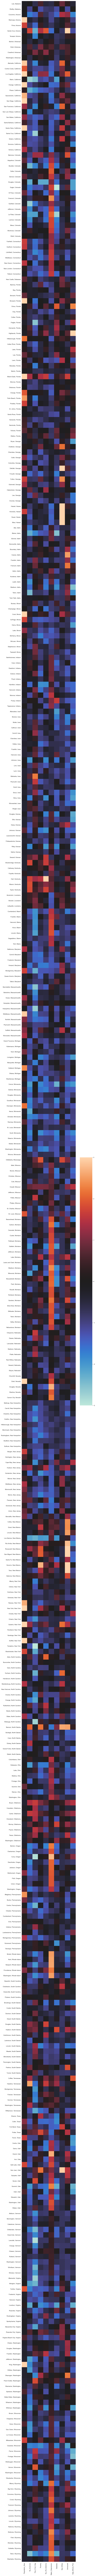

In [133]:
obesity_low_heat_map = obesity[(obesity["Obesity"] < 22.1)]

combined_name = obesity_low_heat_map["CHSI_County_Name"] + ", " + obesity_low_heat_map["CHSI_State_Name"]

for feature in feature_cols: 
    feature_mean = obesity[feature].mean()
    feature_std = obesity[feature].std()
    
    def adjust_data(data):
        return z_score(data, feature_mean, feature_std)
    
    obesity_low_heat_map[feature] = obesity_low_heat_map[feature].map(adjust_data)
    

plt.figure(figsize=(10, 500))
sns.heatmap(obesity_low_heat_map[feature_cols], 
            yticklabels = combined_name, vmin =-3, vmax = 3, center = 0, square = True)

plt.subplots_adjust(bottom=.4)
plt.show()

### 3.3. Model Construction

In [134]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

Finding the best parameters for each model

In [135]:
knn_params = [{"n_neighbors": np.arange(1,30), "metric":["euclidean","manhattan","minkowski"]}]

gauss_params = [{"var_smoothing":np.arange(0.000000001, 10)}]

tree_params = [{'max_depth':np.arange(1,10), 'min_samples_split':[2,10,100]}]

In [136]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid_search.fit(X=X_train_selected,y=y_train)
print("KNN Best parameters: ", knn_grid_search.best_params_)

gauss_grid_search = GridSearchCV(GaussianNB(), gauss_params, cv=5)
gauss_grid_search.fit(X=X_train_selected,y=y_train)
print("\nGauss Best parameters: ", gauss_grid_search.best_params_)

tree_grid_search = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
tree_grid_search.fit(X=X_train_selected,y=y_train)
print("\nTree Best parameters: ", tree_grid_search.best_params_)

KNN Best parameters:  {'metric': 'euclidean', 'n_neighbors': 20}

Gauss Best parameters:  {'var_smoothing': 1e-09}

Tree Best parameters:  {'max_depth': 6, 'min_samples_split': 10}


In [168]:
#A dictionary of algorithms with their best parameters
best_param_est = {
    'kNN': KNeighborsClassifier(n_neighbors=20), 
    'Gaussian': GaussianNB(),
    'Tree': DecisionTreeClassifier(max_depth=6, min_samples_split=10)}

In [169]:
#Get cross validation scores

In [170]:
for estimator_name, estimator_object in best_param_est.items():
    kfold = KFold(n_splits=8, random_state=3000, shuffle=True)
    
    scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
    print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")

kNN: 
	mean accuracy=57.10%, standard deviation=3.90%

Gaussian: 
	mean accuracy=57.66%, standard deviation=3.82%

Tree: 
	mean accuracy=52.44%, standard deviation=4.05%



## Training algorithms

Algorithms were obtained from best params fit dictionary, where they had their best parameters, and were fit using selected train test split data.

In [171]:
knn = best_param_est.get('kNN')
knn.fit(X=X_train_selected, y=y_train)

KNeighborsClassifier(n_neighbors=20)

In [172]:
gaussian = best_param_est.get('Gaussian')
gaussian.fit(X=X_train_selected, y=y_train)

GaussianNB()

In [173]:
tree = best_param_est.get('Tree')
tree.fit(X=X_train_selected, y=y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=10)

### Hypothesis testing

Hypotheses 1 and 2: Finding the top and bottom 2 features

In [143]:
# Samples the dataframe into groups and finds r correlation for each one, will 
# be combined to find mean

obesity_copy = obesity.sample(frac = 1, random_state=3000)
array = np.array_split(obesity_copy,5)

var_cols= ["Population_Size", "No_Exercise", "Few_Fruit_Veg", "Poverty", "No_HS_Diploma", 
      "Major_Depression", "Diabetes", "Non-White", "Uninsured", "High_Blood_Pres"]

obesity_corr = {"group" : [], "corr" : []}

for i in range(5):
    for feature in var_cols:
        obesity_corr["group"].append(feature)
        obesity_corr["corr"].append(abs(array[i][[feature,"Obesity"]].corr()[feature]["Obesity"]))
    
obesity_corr = pd.DataFrame(obesity_corr)

In [144]:
#Shows which are the top 2 and bottom 2 features

import plotly.express as px

def describe_data(data, IV, DV):
    return data.groupby(IV).agg(["count","mean","std","sem"])[DV]

obs_corr_vis = describe_data(obesity_corr, "group", "corr")

In [145]:
obs_corr_vis.reset_index(inplace=True)

In [146]:
def visualize_descriptives():
    plot = px.bar(obs_corr_vis, title="Comparison of r correlation coefficients across features", y = "mean", error_y = "sem", color="mean",x="group",labels={"mean":"Correlation",
                                                                                           "group":"Feature"})
    return plot

visualize_descriptives()

Link to the above graph: https://github.com/hadenpell/ds3000final/blob/tuning/correlations.png

In [147]:
obs_corr_vis

,group,count,mean,std,sem
0,Diabetes,5,0.570588,0.039452,0.017643
1,Few_Fruit_Veg,5,0.411142,0.054998,0.024596
2,High_Blood_Pres,5,0.504512,0.049285,0.022041
3,Major_Depression,5,0.114518,0.035627,0.015933
4,No_Exercise,5,0.600324,0.045717,0.020445
5,No_HS_Diploma,5,0.530838,0.045358,0.020285
6,Non-White,5,0.209215,0.039656,0.017735
7,Population_Size,5,0.196146,0.043416,0.019416
8,Poverty,5,0.428152,0.023620,0.010563
9,Uninsured,5,0.251575,0.033749,0.015093


In [148]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
def oneway_ANOVA(data, IV, DV):
    
    print("-----------------------")
    print("ONE-WAY ANOVA RESULTS")
    print("-----------------------\n\n")
    
    print("F-test")
    print("-------\n")

    
    degree1 = format(len(var_cols) - 1, "n")
    
    d2 = 0
    
    unique = data[IV].unique()
    Population = data[data[IV] == unique[0]][DV]
    No_Exercise = data[data[IV] == unique[1]][DV]
    Few_Fruit_Veg = data[data[IV] == unique[2]][DV]
    Poverty = data[data[IV] == unique[3]][DV] 
    No_Hs = data[data[IV] == unique[4]][DV] 
    Major_Dep = data[data[IV] == unique[5]][DV]
    Diabetes = data[data[IV] == unique[6]][DV]
    Non_w = data[data[IV] == unique[7]][DV] 
    Unin = data[data[IV] == unique[8]][DV]
    HBP = Non_w = data[data[IV] == unique[9]][DV] 
    
    for feature in var_cols:
        d2 += len(Population - 1)
    degree2 = format(d2, "n")
    
    
                 
    
    results = stats.f_oneway(Population, No_Exercise, Few_Fruit_Veg, Poverty, No_Hs, Major_Dep, Diabetes, Non_w, Unin, HBP)
    
    results1 = format(results[0], ".2f")
    results2 = format(results[1], ".4f")
    
    print("F(%s,%s) = %s, p = %s\n\n" % (degree1,degree2,results[0],results[1]))
    
    print("Assumption Checks")
    print("-------------------\n")
    
    print("Assumption of Equality of Variances:")
    print("\t" + str(stats.levene(Population, No_Exercise, Few_Fruit_Veg, Poverty, No_Hs,
                                  Major_Dep, Diabetes, Non_w, Unin, HBP)))
    if (stats.levene(Population, No_Exercise, Few_Fruit_Veg,
                     Poverty, No_Hs, Major_Dep, Diabetes, Non_w, Unin, HBP)[1] > .05):
        print("\tAssumption is met. p > .05\n")
    
    print("Assumption of Normality:")
    
    Population1 = stats.shapiro(Population)
    No_Exercise1 = stats.shapiro(No_Exercise)
    Few_Fruit_Veg1 = stats.shapiro(Few_Fruit_Veg)
    Poverty1 = stats.shapiro(Poverty)
    No_Hs1 = stats.shapiro(No_Hs)
    Major_Dep1 = stats.shapiro(Major_Dep)
    Diabetes1 = stats.shapiro(Diabetes)
    Non_w1 = stats.shapiro(Non_w)
    Unin1 = stats.shapiro(Unin)
    HBP1 = stats.shapiro(HBP)

    
    print("\tPopulation_Size : " + "("+  str(Population1[0]) + "," + str(Population1[1]) + ")")
    if (Population1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
    
    print("\tNo_Exercise : " + "("+  str(No_Exercise1[0]) + "," + str(No_Exercise1[1]) + ")")
    if (No_Exercise1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
    
    print("\tFew_Fruit_Veg : " + "("+  str(Few_Fruit_Veg1[0]) + "," + str(Few_Fruit_Veg1[1]) + ")")
    if (Few_Fruit_Veg1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
        
    print("\tPoverty : " + "("+  str(Poverty1[0]) + "," + str(Poverty1[1]) + ")")
    if (Poverty1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
    
    print("\tNo_HS_Diploma : " + "("+  str(No_Hs1[0]) + "," + str(No_Hs1[1]) + ")")
    if (No_Hs1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
    
    print("\tMajor_Dep : " + "("+  str( Major_Dep1[0]) + "," + str( Major_Dep1[1]) + ")")
    if (Major_Dep1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
        
    print("\tDiabetes : " + "("+  str(Diabetes1[0]) + "," + str(Diabetes1[1]) + ")")
    if (Diabetes1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
        
    print("\tNon_White : " + "("+  str(Non_w1[0]) + "," + str(Non_w1[1]) + ")")
    if (Non_w1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
    
    print("\tUninsured : " + "("+  str(Unin1[0]) + "," + str(Unin1[1]) + ")")
    if (Unin1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
    
    print("\tHigh_Bloop_Pressure : " + "("+  str(HBP1[0]) + "," + str(HBP1[1]) + ")")
    if (HBP1[1] > .05):
        print("\t\tAssumption is met. p > .05\n")
        
    print("")
    
    #POST-HOC TEST
    mc = MultiComparison(data[DV],data[IV])
    tukey_result = mc.tukeyhsd()
    print("Post-hoc Tests")
    print("--------------\n")
    print(tukey_result)

In [149]:
oneway_ANOVA(obesity_corr,"group","corr")

-----------------------
ONE-WAY ANOVA RESULTS
-----------------------


F-test
-------

F(9,50) = 76.2132277257678, p = 2.455162125869693e-22


Assumption Checks
-------------------

Assumption of Equality of Variances:
	LeveneResult(statistic=0.23923451785939676, pvalue=0.9863141738141604)
	Assumption is met. p > .05

Assumption of Normality:
	Population_Size : (0.9875636696815491,0.9704833030700684)
		Assumption is met. p > .05

	No_Exercise : (0.7649978399276733,0.04073786363005638)
	Few_Fruit_Veg : (0.7690054774284363,0.044214725494384766)
	Poverty : (0.9471676349639893,0.7169461846351624)
		Assumption is met. p > .05

	No_HS_Diploma : (0.9234482049942017,0.5524241924285889)
		Assumption is met. p > .05

	Major_Dep : (0.9582198262214661,0.7955360412597656)
		Assumption is met. p > .05

	Diabetes : (0.9696868658065796,0.8732401132583618)
		Assumption is met. p > .05

	Non_White : (0.9583228826522827,0.7962589263916016)
		Assumption is met. p > .05

	Uninsured : (0.8363378047943115,0

### HYPOTHESES 1 AND 2

Absolute values of correlations used instead of actual correlation value because direction of correlation is unimportant for our model's purposes: It did not matter whether the correlation was positive or negative, only that it was significantly different enough that the model would be able to use it for predictions.

A one-way analysis of variance (ANOVA) was conducted to compare the correlations between obesity prevalence and: population size, no exercise prevalence, few fruits/vegetables prevalence, poverty prevalence, no HS diploma prevalence, major depression prevalence, diabetes prevalence, non-white prevalence, uninsured prevalence, and high-blood-pressure prevalence. 
The assumption of normality, as assessed by Shapiro-Wilk's test, (p > .05) was met.
The assumption of Equality of Variances, as assessed by Levene's test, (p > .05) was met.


<p style='color:red'>
<b>HYPOTHESIS 1</b>   
</p>

**Null hypothesis: There is no significant difference in correlations between any of the 10 feature variables and obesity prevalence.**

**Alternative hypothesis: There is a significant difference between correlations of the 10 feature variables, and the features with the most significant correlations will be Poverty and No HS Diploma.**

Results revealed a statistically significant difference among the 10 socioeconomic factor correlations with obesity  F(9, 50) = 76.2132, p < .001. 
Post-hoc comparisons using the Tukey test indicated that in terms of correlation to obesity prevalence, the R coefficient of Diabetes (M = 0.570588, SE = 0.017643) prevalence is not significantly higher than the R coefficient of High Blood Pressure (M = 0.504512, SE = 0.022041) prevalence. In addition, the R coefficient of Diabetes prevalence is not significantly lesser than the R coefficient of No Exercise prevalence (M = 0.600324 SE = 0.020445) prevalence. Again, the R coefficient of Diabetes prevalence is not significantly higher than the R coefficient of No HS Diploma prevalence (M = 0.530838, SE = 0.020285) prevalence. 
The R coefficient of Few Fruits/Vegetables prevalence (M = 0.411142, SE = 0.024596) is not significantly lesser than the R coefficient of Poverty (M = 0.428152, SE = 0.010563) prevalence. 
The R coefficient of High Blood Pressure prevalence (M = 0.504512, SE = 0.022041) is not significantly lesser than the R coefficient of No HS Diploma (M = 0.530838, SE = 0.020285) prevalence. In addition, the R coefficient of High Blood Pressure prevalence is not significantly higher than the R coefficient of Poverty prevalence (M = 0.428152, SE = 0.010563) prevalence. 
The R coefficient of Major Depression prevalence (M = 0.114518, SE = 0.015933) is not significantly higher than the R coefficient of Population (M = 0.196146, SE = 0.019416). 
The R coefficient of No Exercise prevalence (M = 0.600324, SE = 0.020445) is not significantly higher than the R coefficient of No HS Diploma (M = 0.530838, SE = 0.020285) prevalence.
The R coefficient of Non-White prevalence (M = 0.209215, SE = 0.017735) is not significantly lesser than the R coefficient of Uninsured (M = 0.251575, SE = 0.015093) prevalence.  Both of these are not significantly higher than the R coefficient of Population (M = 0.196146, SE = 0.019416).
All other R coefficient comparison pairs (34 pairs) have significant differences in correlation with obesity prevalence.
These results indicate that No Exercise prevalence (top correlated feature) has a non-significantly higher correlation with obesity prevalence than does Diabetes prevalence (second top correlated feature) and No HS Diploma prevalence (third top correlated feature). No Exercise prevalence has a significantly higher correlation with obesity prevalence compared to all other feature variables.
 Diabetes (second top correlated feature) prevalence has a non-significantly higher correlation with obesity prevalence than No HS Diploma prevalence (third top correlated feature) and High Blood pressure prevalence(fourth most correlated feature). Diabetes prevalence has a significantly higher correlation with obesity prevalence compared to all other feature variables.
 
<p style='color:red'>
<b>HYPOTHESIS 2</b>  
</p>

**Null hypothesis: There is no significant difference in correlations between any of the 10 feature variables and obesity prevalence.**

**Alternative hypothesis: There is a significant difference between correlations of the 10 feature variables, and the features with the least significant correlations will be Major Depression and Population Size.**


The results also indicate that Major Depression prevalence (least correlated feature) has a non-significantly lower correlation with obesity prevalence than does Population Size (M = 0.196, SE = 0.019) (second lowest correlated feature). Major Depression prevalence has a significantly lower correlation with obesity prevalence compared to all other feature variables.

Population size has non-significantly lower correlation with both Non-White population prevelance  (M = 0.209, SE = 0.018) and uninsured population prevelance (M = 0.252, SE = 0.015).  These three were significantly lower than all other feature variables.

These results are consistent with our second hypothesis, that the bottom two features correlated with obesity prevalence are Major Depression prevalence and Population Size.  Major Depression has a significantly lower correlation than all groups except Population Size, meaning it has statistical significance as the least correlative variable, but Population Size has insignificantly lower data than Uninsured and Non-white populations, meaning this may or may not be the second least correlative variable.

### Hypothesis test for Hypothesis 3
This test examines the accuracy of various random states for a given estimator,
and sees which one has the best average value.

In [150]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(features, target, random_state=0)
X_train1000, X_test1000, y_train1000, y_test1000 = train_test_split(features, target, random_state=1000)
X_train2000, X_test2000, y_train2000, y_test2000 = train_test_split(features, target, random_state=2000)
X_train3000, X_test3000, y_train3000, y_test3000 = train_test_split(features, target, random_state=3000)
X_train4000, X_test4000, y_train4000, y_test4000 = train_test_split(features, target, random_state=4000)
X_train5000, X_test5000, y_train5000, y_test5000 = train_test_split(features, target, random_state=5000)

In [151]:
select0 = SelectKBest(k=5)
select0.fit(X_train0, y_train0)

X_train_selected0 = select0.transform(X_train0)
X_test_selected0 = select0.transform(X_test0)


select1000 = SelectKBest(k=5)
select1000.fit(X_train1000, y_train1000)

X_train_selected1000 = select1000.transform(X_train1000)
X_test_selected1000 = select1000.transform(X_test1000)

select2000 = SelectKBest(k=5)
select2000.fit(X_train2000, y_train2000)

X_train_selected2000 = select2000.transform(X_train2000)
X_test_selected2000 = select2000.transform(X_test2000)

select3000 = SelectKBest(k=5)
select3000.fit(X_train3000, y_train3000)

X_train_selected3000 = select3000.transform(X_train3000)
X_test_selected3000 = select3000.transform(X_test3000)

select4000 = SelectKBest(k=5)
select4000.fit(X_train4000, y_train4000)

X_train_selected4000 = select4000.transform(X_train4000)
X_test_selected4000 = select4000.transform(X_test4000)

select.fit(X_train5000, y_train5000)

X_train_selected5000 = select.transform(X_train5000)
X_test_selected5000 = select.transform(X_test5000)

In [152]:
model_random_vals = {"Group" : [], "Score" : []}

knn0 = estimators.get('kNN')
knn0.fit(X=X_train_selected0, y=y_train0)

model_random_vals["Group"].append("kNN")
model_random_vals["Score"].append(knn0.score(X_test_selected0, y_test0))

gaussian0 = estimators.get('Gaussian')
gaussian0.fit(X=X_train_selected0, y=y_train0)

model_random_vals["Group"].append("Gaussian")
model_random_vals["Score"].append(gaussian0.score(X_test_selected0, y_test0))

tree0 = estimators.get('Tree')
tree0.fit(X=X_train_selected0, y=y_train0)

model_random_vals["Group"].append("Tree")
model_random_vals["Score"].append(tree0.score(X_test_selected0, y_test0))



knn1000 = estimators.get('kNN')
knn1000.fit(X=X_train_selected1000, y=y_train1000)

model_random_vals["Group"].append("kNN")
model_random_vals["Score"].append(knn1000.score(X_test_selected1000, y_test1000))

gaussian1000 = estimators.get('Gaussian')
gaussian1000.fit(X=X_train_selected1000, y=y_train1000)

model_random_vals["Group"].append("Gaussian")
model_random_vals["Score"].append(gaussian1000.score(X_test_selected1000, y_test1000))

tree1000 = estimators.get('Tree')
tree1000.fit(X=X_train_selected1000, y=y_train1000)

model_random_vals["Group"].append("Tree")
model_random_vals["Score"].append(tree1000.score(X_test_selected1000, y_test1000))




knn2000 = estimators.get('kNN')
knn2000.fit(X=X_train_selected2000, y=y_train2000)

model_random_vals["Group"].append("kNN")
model_random_vals["Score"].append(knn2000.score(X_test_selected2000, y_test2000))

gaussian2000 = estimators.get('Gaussian')
gaussian2000.fit(X=X_train_selected2000, y=y_train2000)

model_random_vals["Group"].append("Gaussian")
model_random_vals["Score"].append(gaussian2000.score(X_test_selected2000, y_test2000))

tree2000 = estimators.get('Tree')
tree2000.fit(X=X_train_selected2000, y=y_train2000)

model_random_vals["Group"].append("Tree")
model_random_vals["Score"].append(tree2000.score(X_test_selected2000, y_test2000))



knn3000 = estimators.get('kNN')
knn3000.fit(X=X_train_selected3000, y=y_train3000)

model_random_vals["Group"].append("kNN")
model_random_vals["Score"].append(knn3000.score(X_test_selected3000, y_test3000))

gaussian3000 = estimators.get('Gaussian')
gaussian3000.fit(X=X_train_selected3000, y=y_train3000)

model_random_vals["Group"].append("Gaussian")
model_random_vals["Score"].append(gaussian3000.score(X_test_selected3000, y_test3000))

tree3000 = estimators.get('Tree')
tree3000.fit(X=X_train_selected1000, y=y_train1000)

model_random_vals["Group"].append("Tree")
model_random_vals["Score"].append(tree3000.score(X_test_selected3000, y_test3000))




knn4000 = estimators.get('kNN')
knn4000.fit(X=X_train_selected4000, y=y_train4000)

model_random_vals["Group"].append("kNN")
model_random_vals["Score"].append(knn4000.score(X_test_selected4000, y_test4000))

gaussian4000 = estimators.get('Gaussian')
gaussian4000.fit(X=X_train_selected4000, y=y_train4000)

model_random_vals["Group"].append("Gaussian")
model_random_vals["Score"].append(gaussian4000.score(X_test_selected4000, y_test4000))

tree4000 = estimators.get('Tree')
tree4000.fit(X=X_train_selected4000, y=y_train4000)

model_random_vals["Group"].append("Tree")
model_random_vals["Score"].append(tree4000.score(X_test_selected4000, y_test4000))


knn5000 = estimators.get('kNN')
knn5000.fit(X=X_train_selected5000, y=y_train5000)

model_random_vals["Group"].append("kNN")
model_random_vals["Score"].append(knn5000.score(X_test_selected5000, y_test5000))

gaussian5000 = estimators.get('Gaussian')
gaussian5000.fit(X=X_train_selected5000, y=y_train5000)

model_random_vals["Group"].append("Gaussian")
model_random_vals["Score"].append(gaussian5000.score(X_test_selected5000, y_test5000))

tree5000 = estimators.get('Tree')
tree5000.fit(X=X_train_selected5000, y=y_train5000)

model_random_vals["Group"].append("Tree")
model_random_vals["Score"].append(tree5000.score(X_test_selected5000, y_test5000))

In [153]:
model_random_vals_pd = pd.DataFrame(model_random_vals)

def describe_data(data, IV, DV):
    return data.groupby(IV).agg(["count","mean","std","sem"])[DV]

model_random_vals_stats = describe_data(model_random_vals_pd, "Group", "Score")

model_random_vals_stats.reset_index(inplace=True)

model_random_vals_stats

,Group,count,mean,std,sem
0,Gaussian,6,0.556175,0.028769,0.011745
1,Tree,6,0.547354,0.051566,0.021052
2,kNN,6,0.561746,0.024262,0.009905


In [154]:
def visualize_model_descriptives():
    plot = px.bar(model_random_vals_stats,title="Comparing Model Performances", x="Group",
                  y = "mean", error_y = "sem", color="mean",labels={"mean":"Score", "Group":"Model"})
    return plot

visualize_model_descriptives()

<p style='color:red'>
<b>HYPOTHESIS 3</b>
</p>

**Null hypothesis**: There is no difference in model performance between K-Nearest-Neighbors, Gaussian Naive Bayes, and Decision Trees. 

**Alternative hypothesis**: There is a significant difference in model performance between KNN, GaussianNB, and Decision Tree, and KNN significantly outperforms GaussianNB and Decision Tree.

A one-way analysis of variance (ANOVA) was conducted to compare the model performance differences between KNN, GaussianNB, and Decision Trees. 

The assumption of normality, as assessed by Shapiro-Wilk's test, (p > .05) was met.

The assumption of Equality of Variances, as assessed by Levene's test, (p > .05) was met.

Results revealed no statistically significant difference among the three classification models  F(2, 18) = 0.08, p > .001.

Given the non-significant results, no post-hoc comparison tests were reported.

### 3.4. Model Evaluation

<b>MODEL SCORES<b>

In [174]:
def tuned_model_scores():
    print("KNN\n")
    print("\tPrediction accuracy on the training data:", format(knn.score(X_train_selected, y_train)*100, ".2f"))
    print("\tPrediction accuracy on the test data:", format(knn.score(X_test_selected, y_test)*100, ".2f"))

    print("\nGaussian NB\n")
    print("\tPrediction accuracy on the training data:", format(gaussian.score(X_train_selected, y_train)*100, ".2f"))
    print("\tPrediction accuracy on the test data:", format(gaussian.score(X_test_selected, y_test)*100, ".2f"))

    print("\nDecision Tree\n")
    print("\tPrediction accuracy on the training data:", format(tree.score(X_train_selected, y_train)*100, ".2f"))
    print("\tPrediction accuracy on the test data:", format(tree.score(X_test_selected, y_test)*100, ".2f"))

In [156]:
tuned_model_scores()

KNN

	Prediction accuracy on the training data: 60.72
	Prediction accuracy on the test data: 59.33

Gaussian NB

	Prediction accuracy on the training data: 58.68
	Prediction accuracy on the test data: 52.65

Decision Tree

	Prediction accuracy on the training data: 65.46
	Prediction accuracy on the test data: 61.00


<b>MODEL CLASSIFICATION REPORTS<b>

In [157]:
from sklearn.metrics import classification_report

In [158]:
knn_predicted = knn.predict(X=X_test_selected)
gauss_predicted = gaussian.predict(X=X_test_selected)
tree_predicted = tree.predict(X=X_test_selected)

expected = y_test

In [159]:
knn_report = classification_report(y_true=expected, y_pred=knn_predicted)

print("KNN class report:\n",knn_report)

KNN class report:
               precision    recall  f1-score   support

        High       0.59      0.63      0.61       117
         Low       0.58      0.72      0.65       111
    Moderate       0.61      0.45      0.52       131

    accuracy                           0.59       359
   macro avg       0.59      0.60      0.59       359
weighted avg       0.60      0.59      0.59       359



In [160]:
gauss_report = classification_report(y_true=expected, y_pred=gauss_predicted)

print("Gaussian NB report:\n",gauss_report)

Gaussian NB report:
               precision    recall  f1-score   support

        High       0.60      0.52      0.56       117
         Low       0.53      0.63      0.58       111
    Moderate       0.46      0.44      0.45       131

    accuracy                           0.53       359
   macro avg       0.53      0.53      0.53       359
weighted avg       0.53      0.53      0.53       359



In [161]:
tree_report = classification_report(y_true=expected, y_pred=tree_predicted)

print("Decision Tree:\n",tree_report)

Decision Tree:
               precision    recall  f1-score   support

        High       0.67      0.61      0.64       117
         Low       0.61      0.77      0.68       111
    Moderate       0.55      0.47      0.51       131

    accuracy                           0.61       359
   macro avg       0.61      0.62      0.61       359
weighted avg       0.61      0.61      0.60       359



The models were tuned for their best parameters using GridSearchCV. Once each model’s best parameters were identified and implemented, the models were tested against the testing set with a cross validation and percentage-split approach and results were compared. Using cross-validation with the optimal parameters for each model revealed that GaussianNB had the highest mean accuracy of 57.66% with a standard deviation of 3.82%. However, when evaluating our tuned model with a percentage-split approach, the tuned model scores revealed that KNN had the highest prediction accuracy on the test data of 57.10% while Gaussian decreased to 52.65%. Due to the further testing required with our model, we decided to continue our analysis with our tuned model using the percentage-split approach. 

To evaluate the performance of all the models on our testing data, tuned model scores from the percentage-split approach were used. The KNN tuned model exhibited 62.02% accuracy on the training data and 57.10% accuracy on the training data. Given that the performance with the training data is similar to the performance with the testing data, there is not much overfitting of the data. Using the classification report, the macro precision average was 0.57, indicating that 57% of the predictions of the correct obesity classifier are correct. The recall score was 0.58, indicating that out of all the correct obesity classifications, the model correctly identifies them 58% of the time. The F1 score was 0.57, indicating a moderate value for the harmonic mean of precision and recall. The accuracy was 0.57, indicating that out of all the model predictions, the model predicted the correct obesity class 57% of the time. 

The GaussianNB model exhibited 58.40% accuracy on the training data and 52.65% accuracy on the training data. Given that the performance with the training data is very similar to the performance with the testing data, the model likely has little to no overfitting. Using the classification report, the macro precision average was 0.53, indicating that 53% of the predictions of the correct obesity classifier are correct. The recall score was 0.53, indicating that out of all the correct obesity classifications, the model correctly identifies them 53% of the time. The F1 score was 0.53, indicating a moderate value for the harmonic mean of precision and recall. The accuracy was 0.53, indicating that out of all the model predictions, the model predicted the correct obesity class 53% of the time.

The Decision Tree model exhibited 70.10% accuracy on the training data and 49.03% accuracy on the testing data. Given that the performance with the training data is much higher than the performance with the testing data, there is clear overfitting of the data. Using the classification report, the macro precision average was 0.49, indicating that 49% of the predictions of the correct obesity classifier are correct. The recall score was 0.49, indicating that out of all the correct obesity classifications, the model correctly identifies them 49% of the time. The F1 score was 0.49, indicating a moderate/low value for the harmonic mean of precision and recall. The accuracy was 0.49, indicating that out of all the model predictions, the model predicted the correct obesity class 49% of the time.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

Models were optimized to avoid issues with overfitting. When performance on the training set was much higher than the performance of the testing set, the models were overfitting and were not able to generalize well to the testing data. The models were tuned to decrease complexity and improve the performance on the testing set by ensuring that they were able to generalize well to new data rather than just the training data. 

Optimization using hyperparameter tuning was done above by using GridSearch to determine the best
parameters for each model before using cross validation to find the model that would yield the best performance.

In [162]:
#Model performances before tuning
knn_untuned = KNeighborsClassifier()
gauss_untuned = GaussianNB()
tree_untuned = DecisionTreeClassifier()

In [163]:
knn_untuned.fit(X=X_train_selected,y=y_train)
gauss_untuned.fit(X=X_train_selected,y=y_train)
tree_untuned.fit(X=X_train_selected,y=y_train)

DecisionTreeClassifier()

In [164]:
def untuned_scores():
    print("KNN\n")
    print("\tPrediction accuracy on the training data:", format(knn_untuned.score(X_train_selected, y_train)*100, ".2f"))
    print("\tPrediction accuracy on the test data:", format(knn_untuned.score(X_test_selected, y_test)*100, ".2f"))

    print("\nGaussian NB\n")
    print("\tPrediction accuracy on the training data:", format(gauss_untuned.score(X_train_selected, y_train)*100, ".2f"))
    print("\tPrediction accuracy on the test data:", format(gauss_untuned.score(X_test_selected, y_test)*100, ".2f"))

    print("\nDecision Tree\n")
    print("\tPrediction accuracy on the training data:", format(tree_untuned.score(X_train_selected, y_train)*100, ".2f"))
    print("\tPrediction accuracy on the test data:", format(tree_untuned.score(X_test_selected, y_test)*100, ".2f"))

In [165]:
untuned_scores()

KNN

	Prediction accuracy on the training data: 67.78
	Prediction accuracy on the test data: 52.37

Gaussian NB

	Prediction accuracy on the training data: 58.40
	Prediction accuracy on the test data: 52.65

Decision Tree

	Prediction accuracy on the training data: 100.00
	Prediction accuracy on the test data: 43.73


### KNN 

* Was also overfitting at a default value of n_neighbors=5
* Too large disparity between training and testing set
* Number of neighbors was obviously too small and the model was too complex

We did not want to exceed 30 neighbors to avoid underfitting our model / making it too simple.
Therefore, we tested n_neighbors between 1 and 30. 

* 20 neighbors yielded the best performance and led to the most optimal KNN classifier model.
* Euclidean distance, which is the default value for KNN was found to be the optimal distance metric.

### Gaussian 

* Did not show explicit over or underfitting at baseline
* Base performance turned out to be the same as its tuned performance, as its default parameter was the most optimal.

We did not explicitly cover Gaussian tuning in class, however, using get_params
we were able to see that GaussianNB had a var_smoothing param which had a default value of 1e-9.

* Tested values between 1e-9 and 10
* The default value was found to be the most optimal.

### Decision tree 
* Had the worst case of overfitting with no default value for max_depth, and a value of 2 for min_samples_split
* Training accuracy was at 100%, while testing accuracy was at 41%
* Needed to decrease complexity by having a small max depth value and increasing min_samples_split value.

In [166]:
#Comparing untuned sets to tuned sets

print("UNTUNED SCORES: ")
untuned_scores()

print("\nTUNED SCORES: ")
tuned_model_scores()

UNTUNED SCORES: 
KNN

	Prediction accuracy on the training data: 67.78
	Prediction accuracy on the test data: 52.37

Gaussian NB

	Prediction accuracy on the training data: 58.40
	Prediction accuracy on the test data: 52.65

Decision Tree

	Prediction accuracy on the training data: 100.00
	Prediction accuracy on the test data: 43.73

TUNED SCORES: 
KNN

	Prediction accuracy on the training data: 60.72
	Prediction accuracy on the test data: 59.33

Gaussian NB

	Prediction accuracy on the training data: 58.68
	Prediction accuracy on the test data: 52.65

Decision Tree

	Prediction accuracy on the training data: 65.46
	Prediction accuracy on the test data: 61.00


### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

With tuned parameters, this is how the algorithms performed on our test set:

In [167]:
print("KNN tuned test set score: ", knn.score(X_test_selected, y_test))
print("GaussianNB tuned test set score: ", gaussian.score(X_test_selected, y_test))
print("Decision tree tuned test set score: ", tree.score(X_test_selected, y_test))

KNN tuned test set score:  0.5933147632311978
GaussianNB tuned test set score:  0.5264623955431755
Decision tree tuned test set score:  0.6100278551532033


Overall, the GaussianNB algorithm had higher mean accuracy using cross validation analysis, however the KNN algorithm performed best on our test set. The decision tree algorithm had the poorest performance out of the other two. However, despite these observations, the differences in performance between the three models was determined to be statistically insignificant. Therefore, it cannot be stated that one model has any statistically significant advantage over the others.

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

Using our obesity dataset, 3 supervised machine-learning classification algorithms were compared: K-Nearest-Neighbors, Gaussian Naive Bayes, and Decision Trees. Out of the three algorithms, the KNN model exhibited the highest performance with a tuned test score of 0.56. The second strongest algorithm model was GaussianNB with a tuned test score of 0.53. The weakest algorithm model was Decision Trees with a tuned test score of 0.48. 
Based on our algorithm performance comparisons, the best algorithm we should use is KNN because it had the highest performance when using its optimal parameters. However, ANOVA results from hypothesis 3 indicated that there were no significant differences in model performance when using any of the three algorithms, but in our analysis KNN had the greatest, non-significant performance.

From our machine learning testing with our dataset, we can not reliably use KNN to predict the target obesity class from our features. The model performance using its best parameters is 0.56, which means the model can only accurately predict the correct target variable from its features 56% of the time. However, model performance is high enough to indicate that a machine learning model could still be viably applied to this dataset if it was the optimal model with the optimal parameters (i.e. if the optimal model is not one of the 3 models we tested).

For hypothesis tests 1 and 2, significant results indicate that a feature variable is strongly correlated with obesity prevalence. Significant differences in feature variable correlations with obesity prevalence can help indicate if features with low/high correlations are truly lower/higher compared to other feature correlations or if that low/high correlation is just by chance. Non-significant results indicate that correlation differences for different features are not genuinely different and are by chance. For example, if two features have different correlations with obesity prevalence but are not significantly different, then it is impossible to definitively conclude which feature has the better or worse correlation with obesity prevalence. Our results are incongruent with hypothesis 1, that the top two features that are correlated with obesity prevalence are poverty prevalence and no HS diploma prevalence. The top feature could be No Exercise prevalence, Diabetes prevalence, or No HS Diploma. The second most correlated feature could be: Diabetes, No HS Diploma, or High Blood Pressure prevalence. From these results, we see that poverty prevalence is not a top two correlative feature while No HS Diploma is. 
In accordance with our second hypothesis, we did find that Major Depression and Population Size are both candidates for belonging in the bottom two correlated features with obesity prevalence. Major Depression has significantly lower data than all groups except Population Size, meaning it has statistical significance as one of the least correlative variables. Population Size has insignificantly lower data than Uninsured and Non-white populations, meaning the other least correlative variable could be Population Size, Uninsured, or Non-white.

For hypothesis test 3, significant results indicate that model performance differences are true and certain models can be classified as better or worse fit for the dataset. Significant results ensure that any differences in model performance are not due to random chance. Non-significant results indicate that model performance differences are due to chance and are not conclusive about a model’s strength compared to other tested models. Our results indicate that the null hypothesis was supported. Since no significant differences were found in model performance between the three algorithms, no one model can be conclusively labelled as the “strongest” model.


In summary, it was interesting to see which socioeconomic factors had the greatest correlation with obesity prevalence in US counties. For future studies, more socioeconomic factors could be incorporated as feature variables, such as distinctions between private and public schooling or median income, and assessed for their correlation with obesity prevalence. Using more socioeconomic factors as feature variables could help identify the specific socioeconomic factors that are most correlated with obesity prevalence. Using these highly-correlated socioeconomic factors, powerful machine learning models could be used that accurately predict obesity risk in a US county based on that county’s optimized socioeconomic feature variables. Another modification that could be interesting to pursue is if the obesity class is split into 4+ categories (i.e. low, moderate-low, moderate-high, high) as opposed to the three categories used in this study (low, moderate, high). Increasing the different obesity classification options may improve or decrease model performance and could be interesting to test. Lastly, another idea for future development could be to use other supervised machine learning classification algorithms, such as Support Vector Machines, for the dataset. Using other classification algorithms could be useful in revealing if there is a stronger model for this dataset compared to the three models tested in this report. (3 obesity classes vs 2 classes).

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

Haden: 
* Data wrangling: Defined obesity classes based on bins and created Obesity_Class column 
* Model training and testing
* Hyperparameter tuning
* Scatter plot visual

Joseph: 
* Data cleaning/wrangling: Merged original dataframes together and extracted necessary features
* Heat map and scatter matrix visuals
* Hypothesis testing

Ajay: 
* Descriptions and write ups for each section
* Hypothesis testing 
* Data analysis: Interpreting results of hypothesis tests and model performance